# About the dataset

* The dataset consists of fake and true news posted on Kaggle.


* This dataset is to be used for classification purposes

# Objective

* Our sole objective is to classify the news from the dataset to fake or true news.


* Extensive EDA of news


* Selecting and building a powerful model for classification

# Importing libraries

Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [7]:
#Basic libraries
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [6]:
#pip install TextBlob

     |████████████████████████████████| 645kB 705kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
# Machine Learning libraries
import sklearn 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [10]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [11]:
#Deep learning libraries
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Importing the dataset

In [3]:
#reading the fake and true datasets

fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [4]:
# print shape of fake dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(fake_news.shape))
print (fake_news.info())
print("\n --------------------------------------- \n")

# print shape of true dataset with rows and columns and information
print ("The shape of the  data is (row, column):"+ str(true_news.shape))
print (true_news.info())

The shape of the  data is (row, column):(23481, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB
None

 --------------------------------------- 

The shape of the  data is (row, column):(21417, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB
None


# Dataset Details

This metadata has two csv files where one dataset contains fake news and the other contains true/real news and has nearly 23481 fake news and 21417 true news

**Description of columns in the file:**

* title- contains news headlines
* text-contains news content/article
* subject- type of news
* date- date the news was published

# Preprocessing and Cleaning

We have to perform certain preprocessing steps before performing EDA and giving the data to the model.Let's begin with creating the output column

**Creating the target column**

Let's create the target column for both fake and true news. Here we are gonna denote the target value as '0' incase of fake news and '1' incase of true news

In [12]:
#Target variable for fake news
fake_news['output']=0

#Target variable for true news
true_news['output']=1

In [13]:
fake_news.head()

,title,text,subject,date,output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [14]:
true_news.head()

,title,text,subject,date,output
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


**Concatenating title and text of news**

News has to be classified based on the tile and text jointly. Treating the title and content of news separately doesn't reap us any benefit. So, lets concatenate both the columns in both datasets

In [15]:
#Concatenating and dropping for fake news
fake_news['news']=fake_news['title']+fake_news['text']
fake_news=fake_news.drop(['title', 'text'], axis=1)

#Concatenating and dropping for true news
true_news['news']=true_news['title']+true_news['text']
true_news=true_news.drop(['title', 'text'], axis=1)

#Rearranging the columns
fake_news = fake_news[['subject', 'date', 'news','output']]
true_news = true_news[['subject', 'date', 'news','output']]

In [16]:
fake_news.head()

,subject,date,news,output
0,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...,0
1,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...,0
2,News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...,0
3,News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...,0


In [17]:
true_news.head()

,subject,date,news,output
0,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1


**Converting the date columns to datetime format**

We can use pd.datetime to convert our date columns to date format we desire. But there was a problem,especially in fake_news date column. Let's check the value_counts() to see what lies inside

In [18]:
fake_news['date'].value_counts()

May 10, 2017                                                                                                                                             46
May 26, 2016                                                                                                                                             44
May 6, 2016                                                                                                                                              44
May 5, 2016                                                                                                                                              44
May 11, 2016                                                                                                                                             43
                                                                                                                                                         ..
https://100percentfedup.com/served-roy-moore-vietnamletter-veter

If you notice, we had links and news headline inside the date column which can give us trouble when converting to datetime format. So let's remove those records from the column

In [19]:
#Removing links and the headline from the date column
fake_news=fake_news[~fake_news.date.str.contains("http")]
fake_news=fake_news[~fake_news.date.str.contains("HOST")]

Only fake news dataset had an issue with date column,Now let's proceed with converting the date column to datetime format

In [20]:
#Converting the date to datetime format
fake_news['date'] = pd.to_datetime(fake_news['date'])
true_news['date'] = pd.to_datetime(true_news['date'])

**Appending two datasets**

When we are providing a dataset for the model, we have to provide it as a single file. So it's better to append both true and fake news data and preprocess it further and perform EDA

In [21]:
frames = [fake_news, true_news]
news_dataset = pd.concat(frames)
news_dataset

,subject,date,news,output
0,News,2017-12-31,Donald Trump Sends Out Embarrassing New Year’...,0
1,News,2017-12-31,Drunk Bragging Trump Staffer Started Russian ...,0
2,News,2017-12-30,Sheriff David Clarke Becomes An Internet Joke...,0
3,News,2017-12-29,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,News,2017-12-25,Pope Francis Just Called Out Donald Trump Dur...,0
...,...,...,...,...
21412,worldnews,2017-08-22,'Fully committed' NATO backs new U.S. approach...,1
21413,worldnews,2017-08-22,LexisNexis withdrew two products from Chinese ...,1
21414,worldnews,2017-08-22,Minsk cultural hub becomes haven from authorit...,1
21415,worldnews,2017-08-22,Vatican upbeat on possibility of Pope Francis ...,1


**Text Processing**

This is an important phase for any text analysis application.There will be many unuseful content in the news which can be an obstacle when feeding to a machine learning model.Unless we remove them the machine learning model doesn't work efficiently. Lets go step by step.

**News-Punctuation Cleaning**


Let's begin our text processing by removing the punctuations

In [22]:
#Creating a copy 
clean_news=news_dataset.copy()

In [23]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [24]:
clean_news['news']=clean_news['news'].apply(lambda x:review_cleaning(x))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends out embarrassing new year’...,0
1,News,2017-12-31,drunk bragging trump staffer started russian ...,0
2,News,2017-12-30,sheriff david clarke becomes an internet joke...,0
3,News,2017-12-29,trump is so obsessed he even has obama’s name...,0
4,News,2017-12-25,pope francis just called out donald trump dur...,0


We have removed all punctuation in our news column

**News-Stop words**

A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. We would not want these words to take up space in our database, or taking up valuable processing time. For this, we can remove them easily, by storing a list of words that you consider to stop words. NLTK(Natural Language Toolkit) in python has a list of stopwords stored in 16 different languages.

For our project, we are considering the english stop words and removing those words

In [25]:
stop = stopwords.words('english')
clean_news['news'] = clean_news['news'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()

,subject,date,news,output
0,News,2017-12-31,donald trump sends embarrassing new year’s eve...,0
1,News,2017-12-31,drunk bragging trump staffer started russian c...,0
2,News,2017-12-30,sheriff david clarke becomes internet joke thr...,0
3,News,2017-12-29,trump obsessed even obama’s name coded website...,0
4,News,2017-12-25,pope francis called donald trump christmas spe...,0


We have removed all the stop words in the news column

# Story Generation and Visualization from news

In this section we will complete do exploratory data analysis on news such as ngram analysis and understand which are all the words,context which are most likely found in fake news

**Count of news subject**

Let's start by looking at the count of news types in our dataset

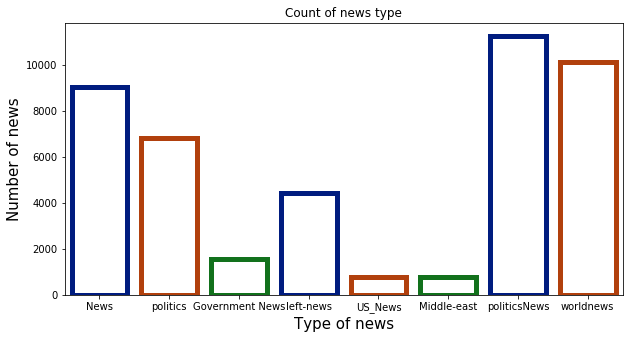

In [26]:
#Plotting the frequency plot
ax = sns.countplot(x="subject", data=clean_news,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))

#Setting labels and font size
ax.set(xlabel='Type of news', ylabel='Number of news',title='Count of news type')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

**Insights:**

* Our dataset has more political news than any other news followed by world news


* We have some repeated class names which expresses same meaning such as news,politics,government news etc which is similar to the alternative

**Count of news subject based on true or fake**

Lets look at the count based on the fake/true outcome.

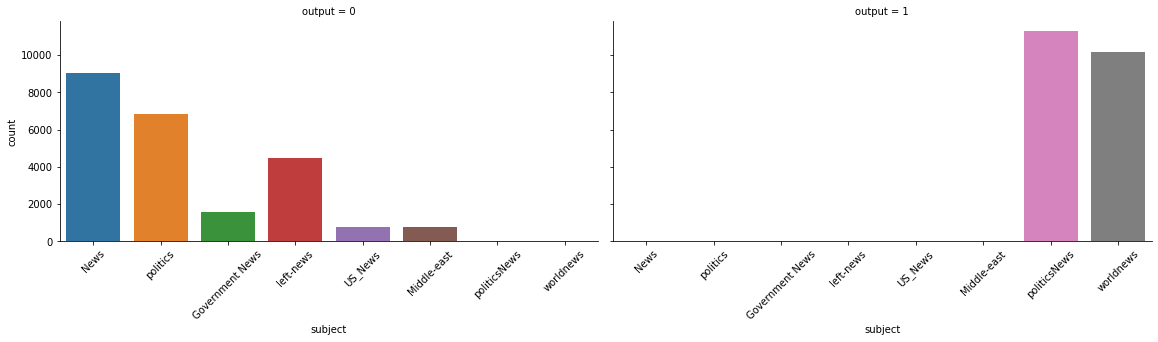

In [27]:
g = sns.catplot(x="subject", col="output",
                data=clean_news, kind="count",
                height=4, aspect=2)

#Rotating the xlabels
g.set_xticklabels(rotation=45)

**Insights:**

* Fake news are all over the category except politics and world news


* True news are present only in politics and world news and the count is high


* This is a highly biased dataset and we can expect higher accuracy which doesn't signify it is a good model considering the poor quality of dataset

**Count of fake news and true news** 

Let's check the count of fake and true news and confirm whether our data is balanced or not

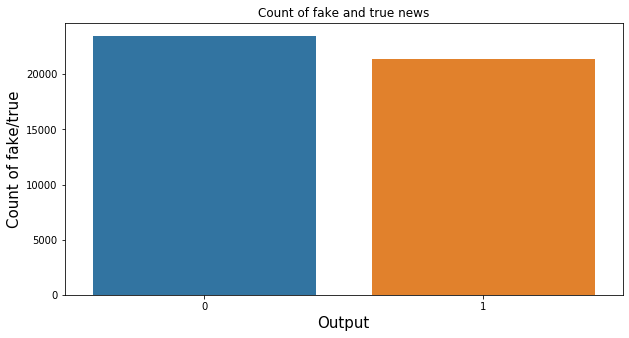

In [28]:
ax=sns.countplot(x="output", data=clean_news)

#Setting labels and font size
ax.set(xlabel='Output', ylabel='Count of fake/true',title='Count of fake and true news')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

**Insights:**

* We have a pretty much balanced data


* But the count of fake news is higher than the true news but not on a greater extent

**Deriving new features from the news**

Lets extract more features from the news feature such as

* Polarity: The measure which signifies the sentiment of the news
    
    
* Review length: Length of the news(number of letters and spaces)
    
    
* Word Count: Number of words in the news

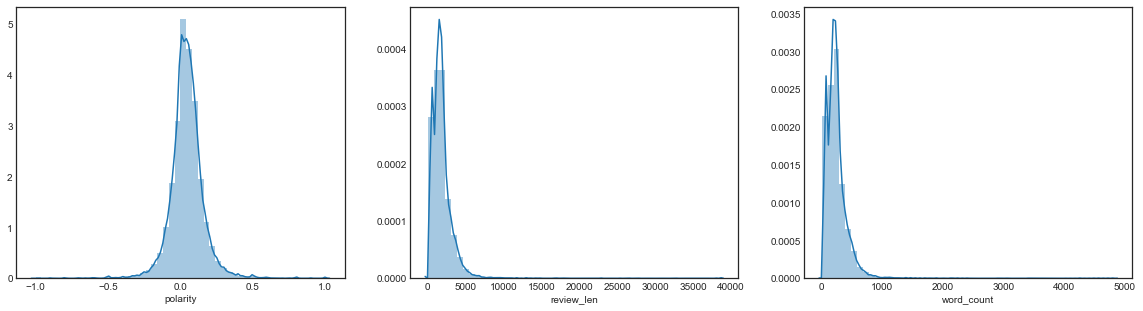

In [29]:
#Extracting the features from the news
clean_news['polarity'] = clean_news['news'].map(lambda text: TextBlob(text).sentiment.polarity)
clean_news['review_len'] = clean_news['news'].astype(str).apply(len)
clean_news['word_count'] = clean_news['news'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(clean_news['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(clean_news['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(clean_news['word_count'])
fig = plt.gcf()

**Insights:**

* Most of the polarity are neutral, neither it shows some bad news nor much happy news


* The word count is between 0-1000 and the length of the news are between 0-5000 and few near 10000 words which could be an article

**N-gram analysis**


**Top 20 words in News**

Let's look at the top 20 words from the news which could give us a brief idea on what news are popular in our dataset

In [30]:
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(clean_news['news'], 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Group by words and plot the sum
df1.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in news')

trump 140400
said 130258
us 68081
would 55422
president 53189
people 41718
one 36146
state 33190
new 31799
also 31209
obama 29881
clinton 29003
house 28716
government 27392
donald 27376
reuters 27348
states 26331
republican 25287
could 24356
white 23823


**Insights:**

* All the top 20 news are about the US government


* Especially it's about Trump and US followed by obama


* We can understand that the news are from reuters.

In [31]:
#Function to get top trigram words
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_trigram(clean_news['news'], 20)

#Printing word and their respective frequencies
for word, freq in common_words:
    print(word, freq)

#Creating a dataframe with words and count
df6 = pd.DataFrame(common_words, columns = ['news' , 'count'])

#Grouping the words and plotting their frequencies
df6.groupby('news').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 trigrams in news')

president donald trump 6808
president barack obama 3735
new york times 2034
donald trump realdonaldtrump 1790
reuters president donald 1476
black lives matter 1436
president united states 1096
white house said 1050
presidentelect donald trump 1043
new york city 1006
president vladimir putin 955
news century wire 951
national security adviser 898
affordable care act 868
director james comey 860
speaker paul ryan 851
fbi director james 778
state rex tillerson 775
secretary state rex 765
russian president vladimir 745


**Insights:**

* There is an important news which ruled the US media-'Black lives matter' post the demise of Floyd. We can see that news has been covered in our data. There were lot of fake news revolved around the death.


* Rest of the news are about US politics

**WordCloud of Fake and True News**

Let's look at the word cloud for both fake and true news

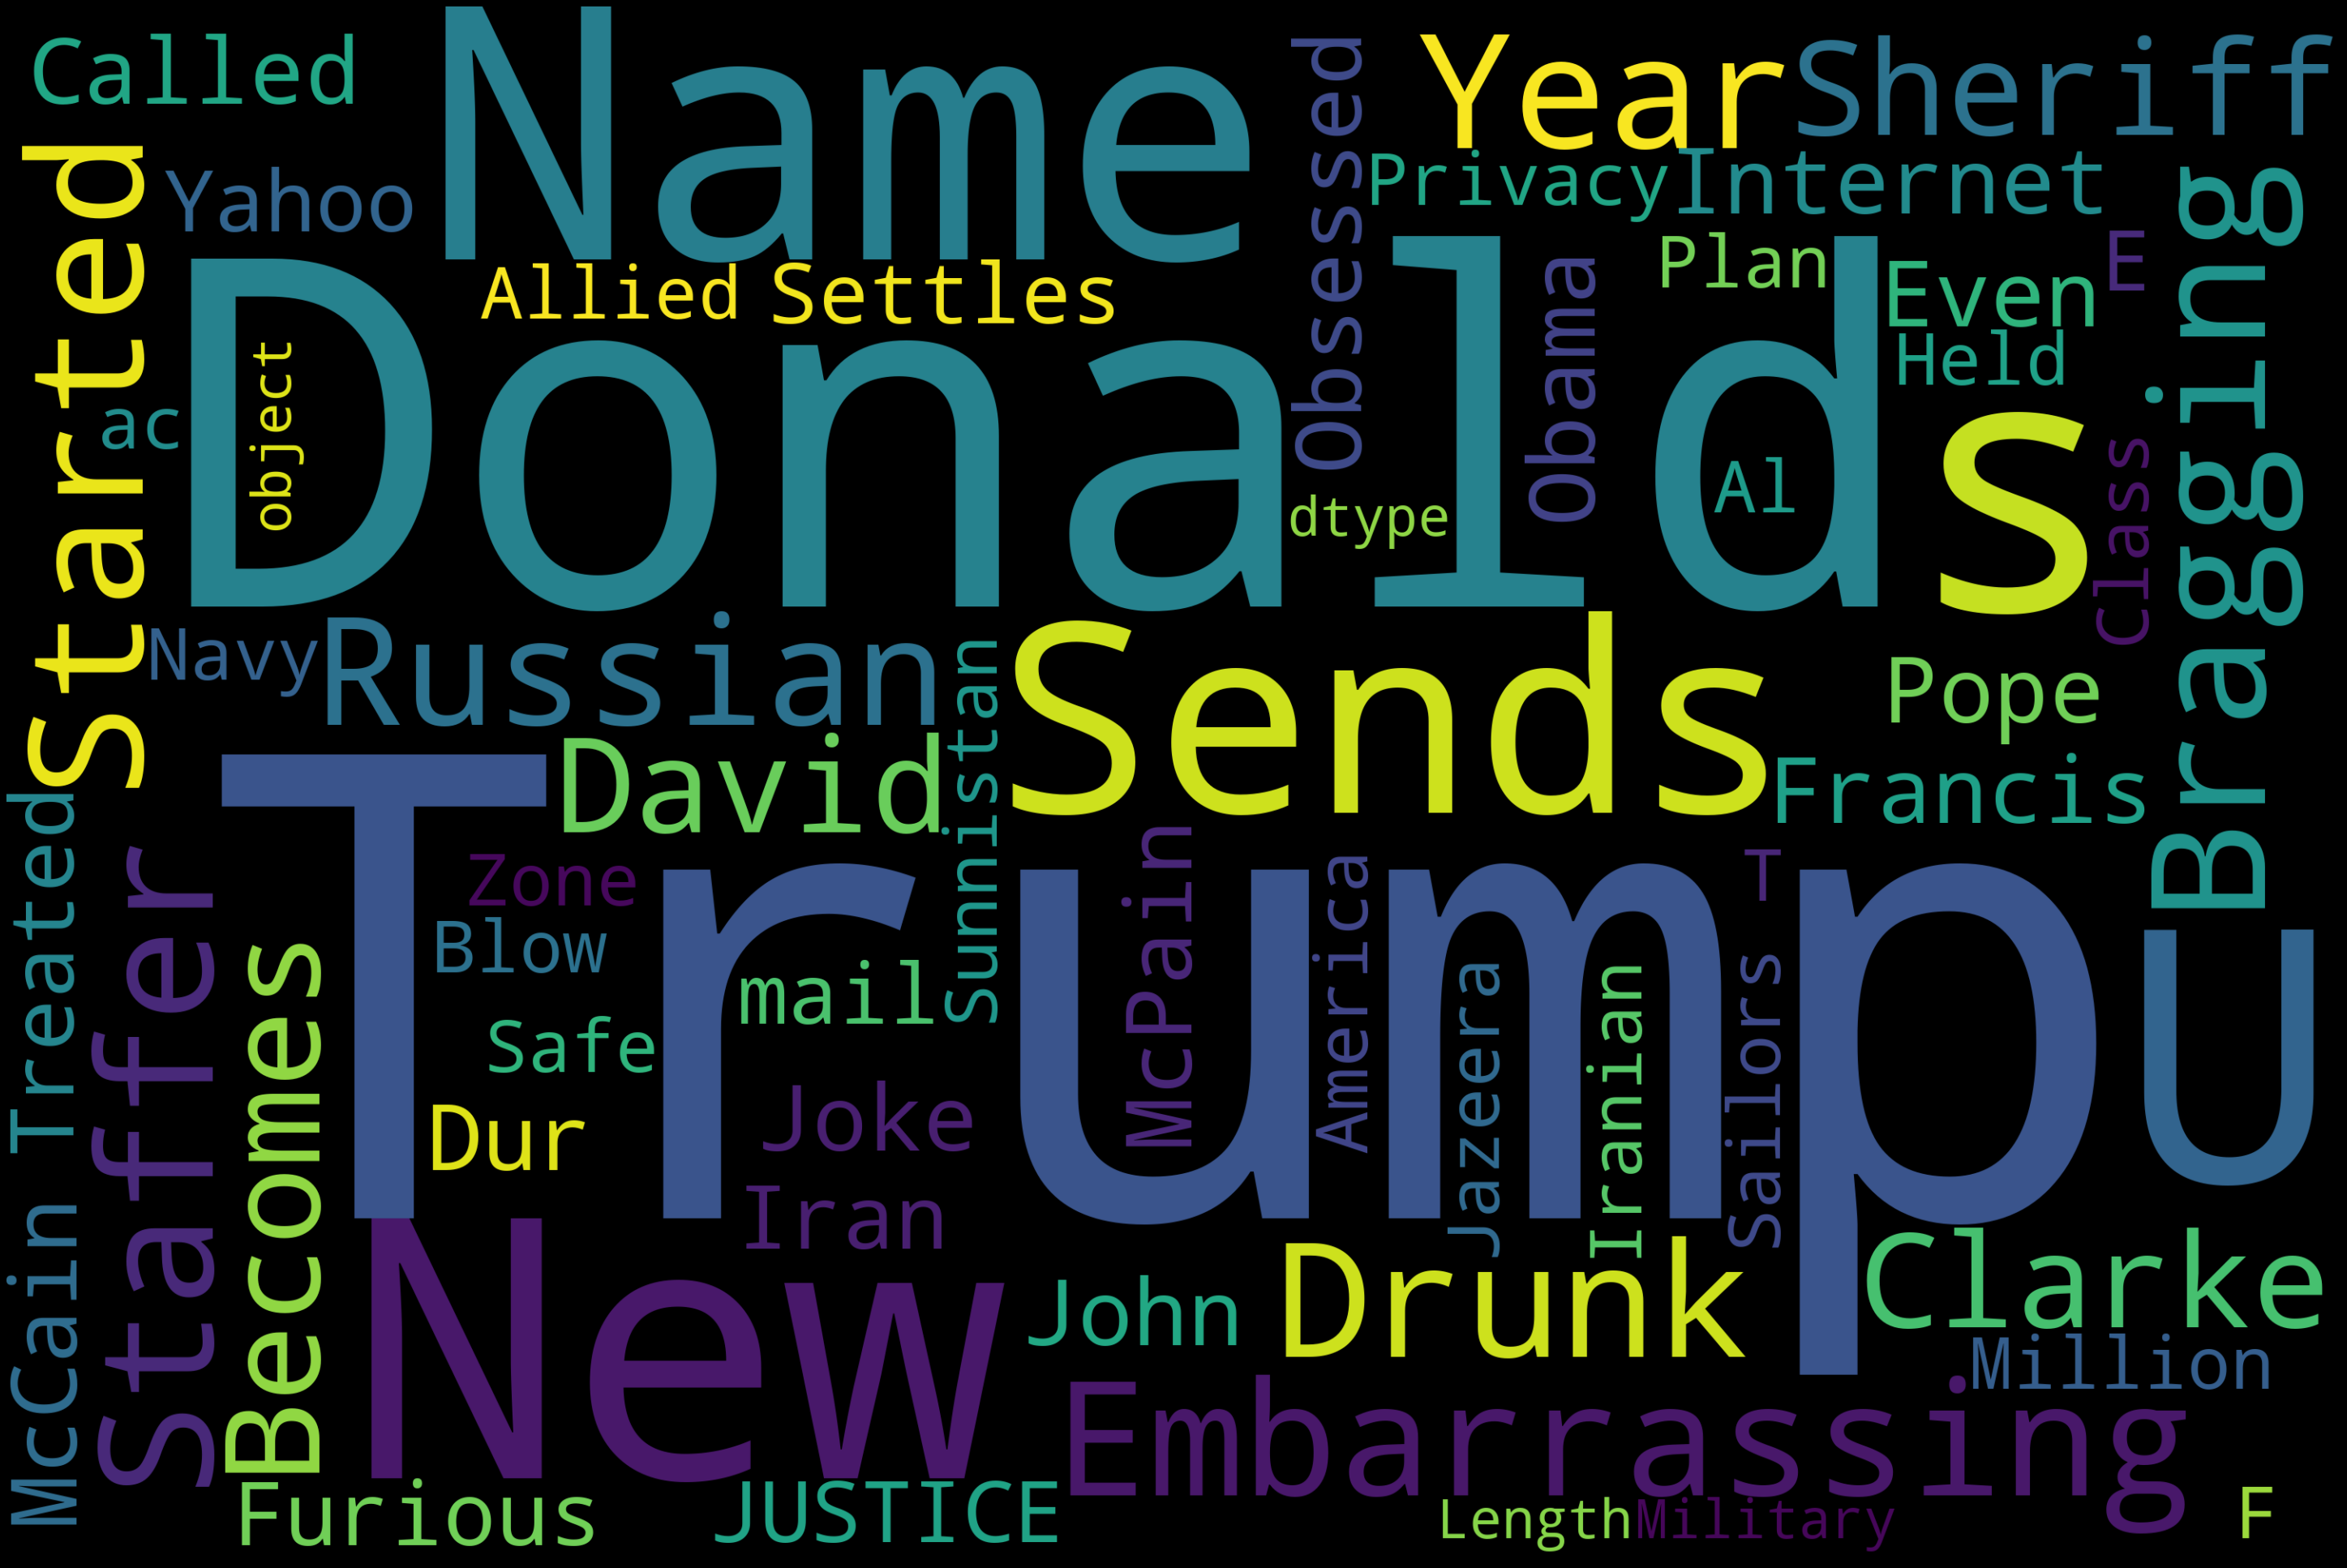

In [32]:
text = fake_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Insights:**

* Most of the fake news revolves around Donald Trump and America


* There are also fake news about privacy, internet etc.,

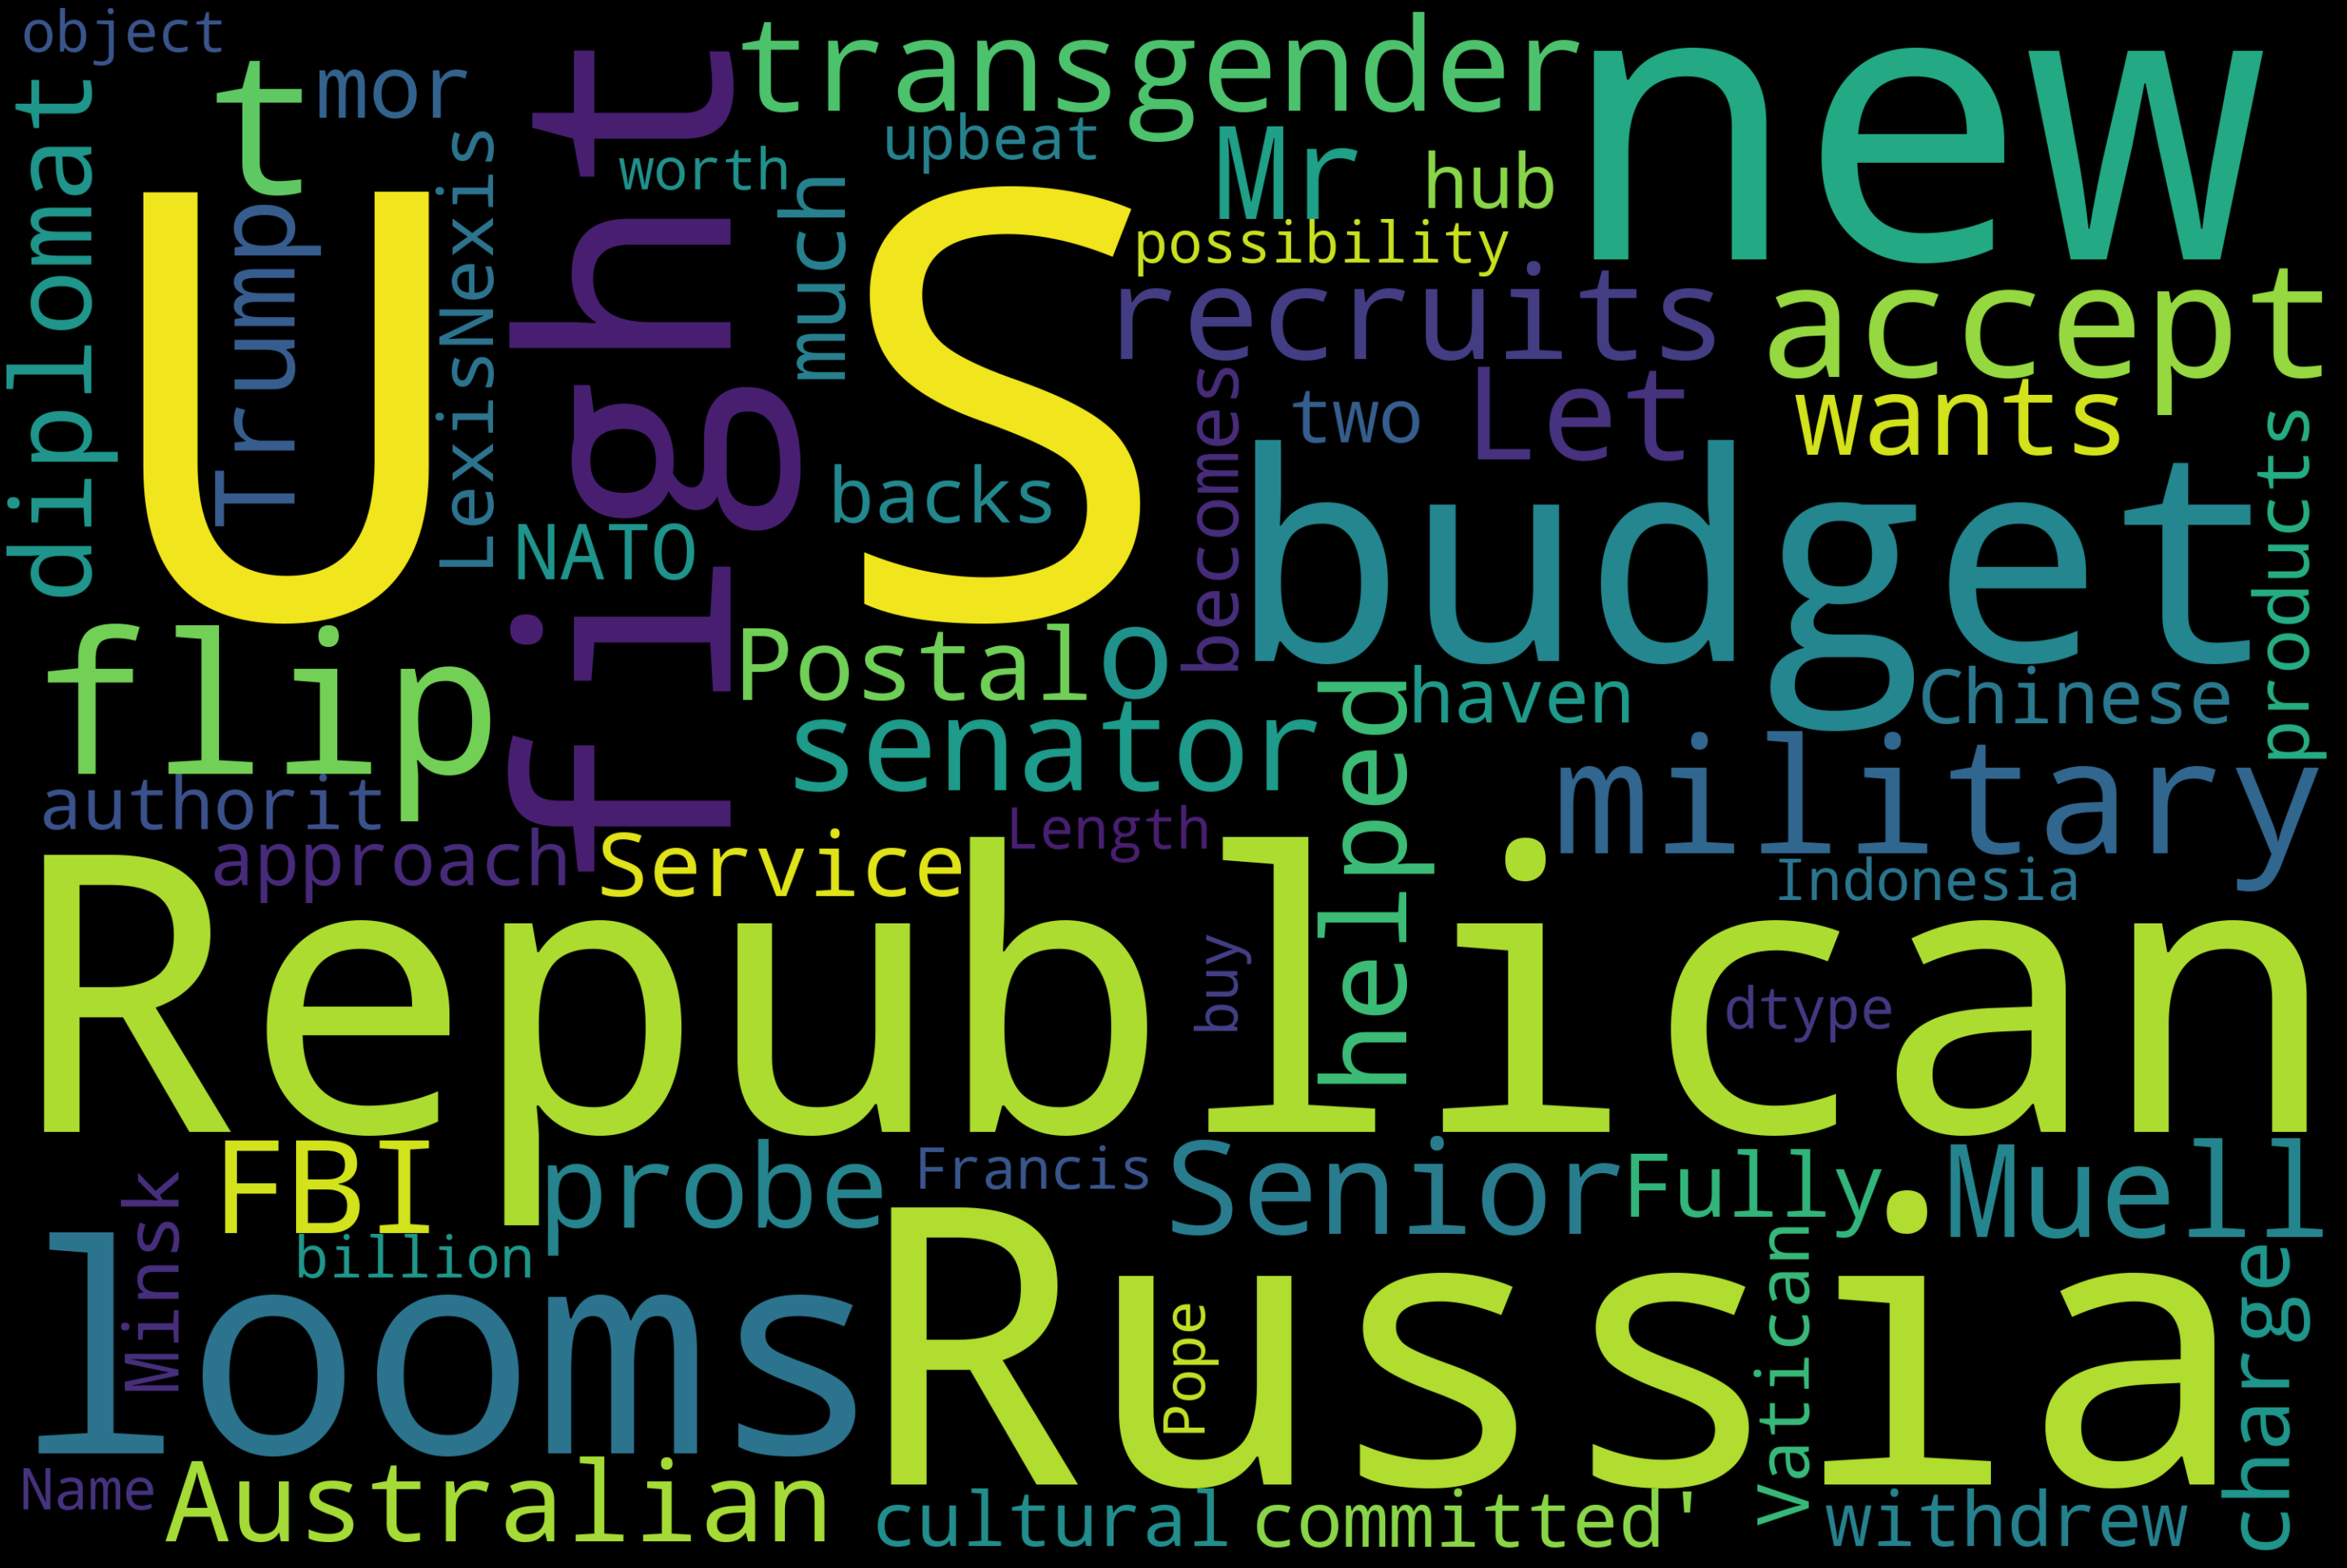

In [33]:
text = true_news["news"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Insights:**

* True news doesn't involve much trump instead on Republican Party and Russia


* There are news about Budget,military which comes under government news

# Stemming & Vectorizing

Stemming is a method of deriving root word from the inflected word. Here we extract the reviews and convert the words in reviews to its root word. for example,

* Going->go
* Finally->fina

If you notice, the root words doesn't need to carry a semantic meaning. There is another technique knows as Lemmatization where it converts the words into root words which has a semantic meaning. Since it takes time. I'm using stemming

In [34]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['news']].reset_index(drop=True)
news_features.head()

,news
0,donald trump sends embarrassing new year’s eve...
1,drunk bragging trump staffer started russian c...
2,sheriff david clarke becomes internet joke thr...
3,trump obsessed even obama’s name coded website...
4,pope francis called donald trump christmas spe...


In [35]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['news'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)  

In [36]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

This is how a line looks like now, as computer cannot understand words and their sentiment we need to convert these words into 1's and 0's. To encode it we use TFIDF

**TFIDF(Term Frequency — Inverse Document Frequency)**

TF-IDF stands for “Term Frequency — Inverse Document Frequency”. This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as bigram (two words) and consider their combined weight.Also we are taking only the top 5000 words from the news.

In [37]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(2,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(news_features['news'])
X.shape

(44888, 5000)

As we have considered 5000 words, we can confirm that we have 5000 columns from the shape.

In [38]:
#Getting the target variable
y=clean_news['output']

**Checking for balance of data**

We should be careful about when handling imbalance data. If it is imbalanced, the model will be biased towards the higher frequency class and returns max output

In [39]:
print(f'Original dataset shape : {Counter(y)}')

Original dataset shape : Counter({0: 23471, 1: 21417})


Our dataset is nearly a balanced one. So let's leave balancing it.

**Train-test split(75:25)**

Using train test split function we are splitting the dataset into 75:25 ratio for train and test set respectively

In [40]:
## Divide the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Model Building: Fake News Classifier

As we have successfully processed the text data, now it is just a normal machine learning problem.

**Model Selection**

First select the best peforming model by using cross validaton. Let's consider all the classification algorithm and perform the model selection process

In [41]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
nb_cv=MultinomialNB(alpha=0.1) 
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv]

#Printing the accuracy
for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.9660040199274997
Decision Tree Test Accuracy: 0.9343025821884273
KNN Test Accuracy: 0.613172841991654
Naive Bayes Test Accuracy: 0.9373328405462511


From the results, we can see logistic regression outdone the rest of the algorithms followed by Naive Bayes and Decision Tree.That's great. So let's go with logistic regression with hyperparameter tuning.

**Logistic Regression with Hyperparameter Tuning**

We use regularization parameter and penality for parameter tuning. let's see which one to plug.

In [42]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

LogisticRegression(C=24.420530945486497, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
The mean accuracy of the model is: 0.9803065407235787


In [43]:
logreg = LogisticRegression(C=24.420530945486497, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


**Confusion Matrix**

Let's look at the true positive and true negative classified by the model

In [52]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[5799   93]
 [ 128 5202]]


Check out the diagonal elements(5799+5202), they are correctly predicted records and rest are incorrectly classified by the algorithm. Our model has done well

**Classification Report**

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5892
           1       0.98      0.98      0.98      5330

    accuracy                           0.98     11222
   macro avg       0.98      0.98      0.98     11222
weighted avg       0.98      0.98      0.98     11222



All our scores are 98%. There are only changes in the support.

# Deep learning-LSTM

Here in this part we use neural network to predict whether the given news is fake or not.

We aren't gonna use normal neural network like ANN to clasify but LSTM(long short term memory) which helps in containing sequence information.Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more.

**One hot encoding for Embedding layers**

Before jumping into creating a layer let's take some vocabulary size. There might be a question why vocabulary size ? it is because we will be one hot encoding the sentences in the corpus for embedding layers. While onehot encoding the words in sentences will take the index from the vocabulary size. Let's fix the vocabulary size to 10000

In [54]:
corpus[1]

'drunk brag trump staffer start russian collus investigationhous intellig committe chairman devin nune go bad day assumpt like mani us christoph steeledossi prompt russia investig lash depart justic fbi order protect trump happen dossier start investig accord document obtain new york timesform trump campaign advis georg papadopoulo drunk wine bar reveal knowledg russian opposit research hillari clintonon top papadopoulo covfef boy trump administr alleg much larger role none damn drunken fool wine bar coffe boy help arrang new york meet trump presid abdel fattah elsisi egypt two month elect known former aid set meet world leader trump team trump ran mere coffe boyin may papadopoulo reveal australian diplomat alexand downer russian offici shop around possibl dirt thendemocrat presidenti nomine hillari clinton exactli much mr papadopoulo said night kensington wine room australian alexand downer unclear report state two month later leak democrat email began appear onlin australian offici p

In [55]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

We can see all the words in the sentences are transformed into their index from the vocabulary we created.

**Padding embedded documents**

All the neural networks require to have inputs that have the same shape and size. However, when we pre-process and use the texts as inputs for our LSTM model, not all the sentences have the same length. In other words, naturally, some of the sentences are longer or shorter. We need to have the inputs with the same size, this is where the padding is necessary. Here we take the common length as 5000 and perform padding using pad_sequence() function . Also we are going to 'pre' pad so that zeros are added before the sentences to make the sentence of equal length

In [57]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  488 3068 1428]
 [   0    0    0 ... 5730 3576 1428]
 [   0    0    0 ... 8408 9084 1428]
 ...
 [   0    0    0 ... 2209  627 5051]
 [   0    0    0 ... 3711  604 5799]
 [   0    0    0 ... 3112 2005 8243]]


In [58]:
embedded_docs[1]

array([   0,    0,    0, ..., 5730, 3576, 1428], dtype=int32)

We can see all the sentences are of equal length with the addition of zeros infront of the sentences and making all the sentences of length 5000

**LSTM Model**

At first we are going to develop the base model and compile it. The first layer will be the embedding layer which has the input of vocabulary size, vector features and sentence length. Later we add 30% dropout layer to prevent overfitting and the LSTM layer which has 100 neurons in the layer.In final layer we use sigmoid activation function. Later we compile the model using adam optimizer and binary cross entropy as loss function since we have only two outputs.

LSTM remembers only the important sequence of words and forgets the insignificant words which doesn't add value in the prediction

In [59]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 40)          400000    
_________________________________________________________________
dropout (Dropout)            (None, 5000, 40)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [60]:
len(embedded_docs),y.shape

(44888, (44888,))

**Fitting the LSTM Model**

Before fitting to the model, let's consider the padded embedded object as X and y as y itself and convert them into an array.

In [61]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(y)

#Check shape of X and y final
X_final.shape,y_final.shape

((44888, 5000), (44888,))

Let's split our new X and y variable into train and test and proceed with fitting the model to the data. We have considered 10 epochs and 64 as batch size. It can be varied to get better results.

In [62]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
470/470 [==============================] - 4004s 9s/step - loss: 0.1905 - accuracy: 0.9242 - val_loss: 0.1302 - val_accuracy: 0.9554
Epoch 2/10
470/470 [==============================] - 4006s 9s/step - loss: 0.0605 - accuracy: 0.9816 - val_loss: 0.0939 - val_accuracy: 0.9669
Epoch 3/10
470/470 [==============================] - 4019s 9s/step - loss: 0.0400 - accuracy: 0.9884 - val_loss: 0.0458 - val_accuracy: 0.9861
Epoch 4/10
470/470 [==============================] - 3921s 8s/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 5/10
470/470 [==============================] - 3989s 8s/step - loss: 0.0422 - accuracy: 0.9878 - val_loss: 0.0580 - val_accuracy: 0.9831
Epoch 6/10
470/470 [==============================] - 4117s 9s/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.0625 - val_accuracy: 0.9838
Epoch 7/10
470/470 [==============================] - 3937s 8s/step - loss: 0.0254 - accuracy: 0.9937 - val_loss: 0.0683 - val_accuracy:

**Evaluation of model**

Now, let's predict the output for our test data and evaluate the predicted values with y_test

In [63]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [64]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[7777    0]
 [3273 3764]]


In [65]:
#Checking for accuracy
accuracy_score(y_test,y_pred)

0.7790603483191576

In [66]:
# Creating classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.83      7777
           1       1.00      0.53      0.70      7037

    accuracy                           0.78     14814
   macro avg       0.85      0.77      0.76     14814
weighted avg       0.84      0.78      0.76     14814



# Conclusion

* We have made a Logistic Regression model(98%) and a CNN model(78%) that can classify the fake and true news accurately. 


* We began by importing the datasets, performing exploratory data analysis, cleaned the data and made it in a format that can be useful to train the model.


* This noetbook thus serves as an excellent medium to learn how to perform sentiment analysis and text classification. 

# References



[1] https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset
    
[2] https://www.kaggle.com/benroshan/fake-news-classifier-lstm

# License

MIT License

Copyright (c) 2020 Prasham Shah

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.